# Project Overview

**Goal:** Find the best place for a new well for Oily mining company
- Collect the oil well parameters in the selected region:
    - Oil quality
    - Volume of reserves
- Build a model for predicting the volume of reserves in the new wells
- Pick the oil wells with the highest estimated values
- Pick the region with the highest total profit for the selected oil wells
The data is on oil samples from 3 regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

# Environment Setup and Required Libraries

## Plan of Action:
- Download & Prepare the Data
- Train and Test the Model for each Region
    - split the data into a training set and validation set at a ratio of 75:25
    - Train the model and make predictions for the validation set
    - Save the predictions and correct answers for the validation set
    - Print the average volume of predicted reserves and model RMSE
    - Analyze the results
- Prepare for profit calculation
    - Store all key values for calculations in separate variables
    - Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region
    - Provide the findings about the preparation for the profit calculation step
- Write a function to calculate profit from a set of selected oil wells and model predictions
    - Pick the wells with the highest values of predictions
    - Summarize the target volume of reserves in accordance with these predictions
    - Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves
- Calculate risks and profit for each region:
    - Use the bootstrapping technique with 1000 samples to find the distribution of profit
    - Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage
    - Provide findings: suggest a region for development of oil wells and justify the choice



## Conditions
- Only linear regression is suitable for this model's training
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation
- The budget for development of 200 oil wells is 100 million USD
- One barrel of raw materials brings 4.5 USD of revene. The revenue from one unit of product is 4,500 USD (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected

**Target:** `product`

**Features:** `f0`,`f1`,`f2`

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Download and Prepare the Data

In [2]:
# Download Region 1 Data
region_1 = pd.read_csv(r"C:\Projects\my-portfolio\Project_9\geo_data_0.csv")
display(region_1)

# Download Region 2 Data
region_2 = pd.read_csv(r"C:\Projects\my-portfolio\Project_9\geo_data_1.csv")
display(region_2)

# Download Region 3 Data
region_3 = pd.read_csv(r"C:\Projects\my-portfolio\Project_9\geo_data_2.csv")
display(region_3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [3]:
# Locate duplicate oil wells for region_1
display(region_1.duplicated().sum())
display(region_1['id'].duplicated().sum())

np.int64(0)

np.int64(10)

In [4]:

# Choose which set to get rid of
duplicated_region_1 = region_1[region_1['id'].duplicated(keep=False)]
display(duplicated_region_1)


,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


In [5]:
# Keep the duplicates with the highest values
duplicated_region_1_sorted = region_1.sort_values(by = 'product',ascending=False)
display(duplicated_region_1_sorted)

region_1_clean = duplicated_region_1_sorted.drop_duplicates(subset = ['id'], keep = 'first')
display(region_1_clean)

# Check if the duplicates are gone
region_1_clean['id'].duplicated().sum()

display(region_1_clean[region_1_clean['id'] == 'bxg6G'])
region_1_clean[region_1_clean['id'] == 'QcMuo']

# Reset the index
region_1_clean = region_1_clean.reset_index(drop=True)

,id,f0,f1,f2,product
8826,rjMou,1.797736,0.098212,6.148260,185.364347
99818,7cHIv,0.518445,-0.412790,4.951916,185.362690
94175,uCDzR,0.351428,-0.400244,7.227618,185.355615
1925,IfqrC,0.624430,-0.469312,5.753677,185.354980
45291,5FEPb,1.758787,-0.395038,6.719085,185.352015
...,...,...,...,...,...
55969,EeI1x,-0.792553,0.439711,-0.696314,0.021781
5105,kmJjD,-0.701882,0.570246,2.288005,0.009428
58769,YcHB5,-0.702486,0.523053,-1.224802,0.006114
97721,oZ3UJ,0.701532,0.808797,-2.221334,0.004022


,id,f0,f1,f2,product
8826,rjMou,1.797736,0.098212,6.148260,185.364347
99818,7cHIv,0.518445,-0.412790,4.951916,185.362690
94175,uCDzR,0.351428,-0.400244,7.227618,185.355615
1925,IfqrC,0.624430,-0.469312,5.753677,185.354980
45291,5FEPb,1.758787,-0.395038,6.719085,185.352015
...,...,...,...,...,...
55969,EeI1x,-0.792553,0.439711,-0.696314,0.021781
5105,kmJjD,-0.701882,0.570246,2.288005,0.009428
58769,YcHB5,-0.702486,0.523053,-1.224802,0.006114
97721,oZ3UJ,0.701532,0.808797,-2.221334,0.004022


,id,f0,f1,f2,product
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798


In [6]:
# Check for missing data and general info for region_1
region_1.info()
region_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# Check for missing data and general info for region_2
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
# Check duplicates for region_2
display(region_2.duplicated().sum())
region_2['id'].duplicated().sum()

np.int64(0)

np.int64(4)

In [9]:
# Display all duplicates for region_2
display(region_2[region_2['id'].duplicated(keep=False)])

# Sort region_2
region_2_sorted = region_2.sort_values(by='product',ascending = False)
display(region_2_sorted)

# Check the sorted values
display(region_2_sorted[region_2_sorted['id'].duplicated(keep=False)])

# Keep the higher values
region_2_clean = region_2_sorted.drop_duplicates(subset=['id'],keep='first')

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


,id,f0,f1,f2,product
89365,kM3uQ,-4.237488,-5.947726,4.995436,137.945408
7215,oU4Lm,-3.957563,-2.670317,4.997494,137.945408
79168,tkegj,-1.166033,1.897682,4.989823,137.945408
79174,1ZlMX,-6.480693,-2.436037,5.001632,137.945408
79187,XjkaY,-9.453188,1.241023,4.998400,137.945408
...,...,...,...,...,...
41477,Skjcw,5.897177,-1.156538,-0.001597,0.000000
41475,Cklyb,2.490430,10.888532,0.001702,0.000000
99973,VsayB,12.698645,-4.384673,-0.002600,0.000000
41457,qI2C7,12.284843,-10.225632,0.000526,0.000000


,id,f0,f1,f2,product
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103


In [10]:
# Display the new dataset for region_2
display(region_2_clean)

# Check for duplicated data 
display(region_2_clean.duplicated().sum())

# Reset region_2 index
region_2_clean = region_2_clean.reset_index(drop = True)

# Look at the new information for region_2 data
region_2_clean.info()

,id,f0,f1,f2,product
89365,kM3uQ,-4.237488,-5.947726,4.995436,137.945408
7215,oU4Lm,-3.957563,-2.670317,4.997494,137.945408
79168,tkegj,-1.166033,1.897682,4.989823,137.945408
79174,1ZlMX,-6.480693,-2.436037,5.001632,137.945408
79187,XjkaY,-9.453188,1.241023,4.998400,137.945408
...,...,...,...,...,...
41477,Skjcw,5.897177,-1.156538,-0.001597,0.000000
41475,Cklyb,2.490430,10.888532,0.001702,0.000000
99973,VsayB,12.698645,-4.384673,-0.002600,0.000000
41457,qI2C7,12.284843,-10.225632,0.000526,0.000000


np.int64(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99996 entries, 0 to 99995
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
# Check general information for region_3
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
# Check for duplicates in region_3
display(region_3.duplicated().sum())
region_3['id'].duplicated().sum()

np.int64(0)

np.int64(4)

In [13]:
# Look at the duplicated data in region_2
region_3[region_3['id'].duplicated(keep=False)]

,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


In [14]:
# Sort Region_3 from highest to lowest
region_3_sorted = region_3.sort_values(by='product',ascending = False)
display(region_3_sorted)

,id,f0,f1,f2,product
79705,UAhji,-2.747914,1.555227,3.342182,190.029838
93444,IB0JE,3.026506,1.344623,8.891243,190.013589
35099,2HeCn,2.848844,-1.701996,9.437101,190.011722
21943,dldNH,-2.500091,2.024392,6.291513,190.010982
37870,CpuBi,-0.686667,-3.219452,5.963290,190.010029
...,...,...,...,...,...
39815,Qi2Do,-0.611718,0.951748,1.986600,0.014039
31253,ABIo5,0.028724,0.998376,-0.608745,0.009761
32261,TNDTo,-1.346806,0.819415,-3.498344,0.009204
43452,xMjFy,-0.832947,1.365373,2.766343,0.004606


In [15]:
# Keep the highest values from the duplicated data
region_3_clean = region_3_sorted.drop_duplicates(subset=['id'],keep='first')
display(region_3_clean)

# Ensure proper data has been kept
region_3_clean[region_3_clean['id'] == 'xCHr8']

# Reset Index for Region 3
region_3_clean = region_3_clean.reset_index(drop=True)

,id,f0,f1,f2,product
79705,UAhji,-2.747914,1.555227,3.342182,190.029838
93444,IB0JE,3.026506,1.344623,8.891243,190.013589
35099,2HeCn,2.848844,-1.701996,9.437101,190.011722
21943,dldNH,-2.500091,2.024392,6.291513,190.010982
37870,CpuBi,-0.686667,-3.219452,5.963290,190.010029
...,...,...,...,...,...
39815,Qi2Do,-0.611718,0.951748,1.986600,0.014039
31253,ABIo5,0.028724,0.998376,-0.608745,0.009761
32261,TNDTo,-1.346806,0.819415,-3.498344,0.009204
43452,xMjFy,-0.832947,1.365373,2.766343,0.004606


In [16]:
# Check altered region_3_clean
region_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99996 entries, 0 to 99995
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
display(region_1_clean,region_2_clean, region_3_clean)

,id,f0,f1,f2,product
0,rjMou,1.797736,0.098212,6.148260,185.364347
1,7cHIv,0.518445,-0.412790,4.951916,185.362690
2,uCDzR,0.351428,-0.400244,7.227618,185.355615
3,IfqrC,0.624430,-0.469312,5.753677,185.354980
4,5FEPb,1.758787,-0.395038,6.719085,185.352015
...,...,...,...,...,...
99985,EeI1x,-0.792553,0.439711,-0.696314,0.021781
99986,kmJjD,-0.701882,0.570246,2.288005,0.009428
99987,YcHB5,-0.702486,0.523053,-1.224802,0.006114
99988,oZ3UJ,0.701532,0.808797,-2.221334,0.004022


,id,f0,f1,f2,product
0,kM3uQ,-4.237488,-5.947726,4.995436,137.945408
1,oU4Lm,-3.957563,-2.670317,4.997494,137.945408
2,tkegj,-1.166033,1.897682,4.989823,137.945408
3,1ZlMX,-6.480693,-2.436037,5.001632,137.945408
4,XjkaY,-9.453188,1.241023,4.998400,137.945408
...,...,...,...,...,...
99991,Skjcw,5.897177,-1.156538,-0.001597,0.000000
99992,Cklyb,2.490430,10.888532,0.001702,0.000000
99993,VsayB,12.698645,-4.384673,-0.002600,0.000000
99994,qI2C7,12.284843,-10.225632,0.000526,0.000000


,id,f0,f1,f2,product
0,UAhji,-2.747914,1.555227,3.342182,190.029838
1,IB0JE,3.026506,1.344623,8.891243,190.013589
2,2HeCn,2.848844,-1.701996,9.437101,190.011722
3,dldNH,-2.500091,2.024392,6.291513,190.010982
4,CpuBi,-0.686667,-3.219452,5.963290,190.010029
...,...,...,...,...,...
99991,Qi2Do,-0.611718,0.951748,1.986600,0.014039
99992,ABIo5,0.028724,0.998376,-0.608745,0.009761
99993,TNDTo,-1.346806,0.819415,-3.498344,0.009204
99994,xMjFy,-0.832947,1.365373,2.766343,0.004606


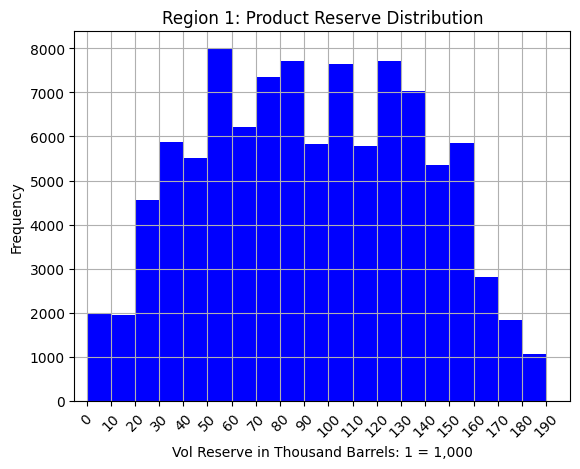

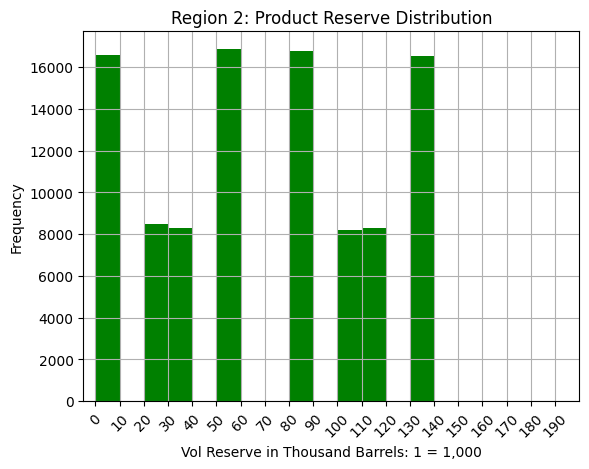

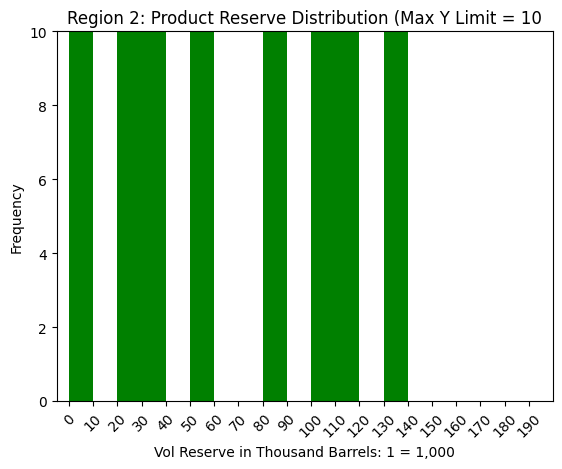

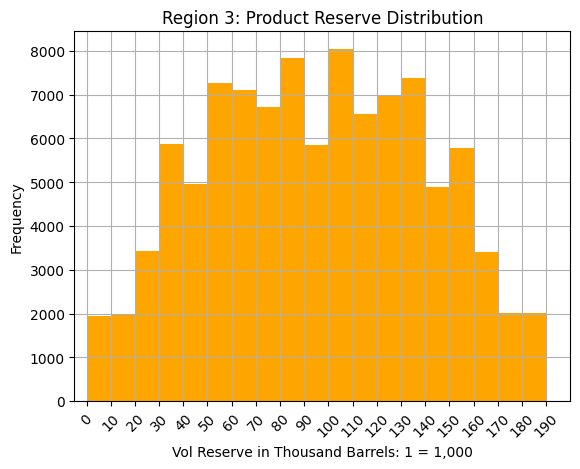

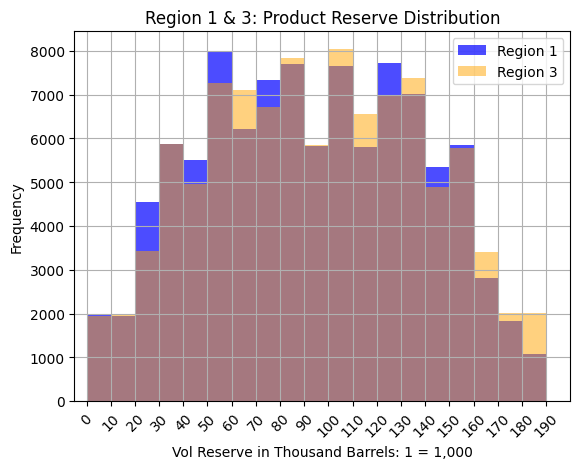

In [18]:
# Distribution Comparison

# Region 1
region_1_clean['product'].plot(kind = 'hist', bins = np.arange(0,191,10), color = 'blue', rot = 45, grid = True)
plt.xlabel("Vol Reserve in Thousand Barrels: 1 = 1,000")
plt.title("Region 1: Product Reserve Distribution")
plt.xlim(-5,200)
plt.xticks(np.arange(0,191, 10))
plt.show()

# Region 2

region_2_clean['product'].plot(kind = 'hist', bins = np.arange(0,191,10), color = 'green', rot = 45, grid = True)
plt.xlabel("Vol Reserve in Thousand Barrels: 1 = 1,000")
plt.title("Region 2: Product Reserve Distribution")
plt.xlim(-5,200)
plt.xticks(np.arange(0,191, 10))
plt.show()

# Region 2 Lower Limit
region_2_clean['product'].plot(kind = 'hist', bins = np.arange(0,191,10), color = 'green', rot = 45)
plt.xlabel("Vol Reserve in Thousand Barrels: 1 = 1,000")
plt.ylim(0,10)
plt.title("Region 2: Product Reserve Distribution (Max Y Limit = 10")
plt.xlim(-5,200)
plt.xticks(np.arange(0,191, 10))
plt.show()


# Region 3
region_3_clean['product'].plot(kind = 'hist', bins = np.arange(0,191,10), color = 'orange', rot = 45, grid = True)
plt.xlabel("Vol Reserve in Thousand Barrels: 1 = 1,000")
plt.title("Region 3: Product Reserve Distribution")
plt.xlim(-5,200)
plt.xticks(np.arange(0,191, 10))
plt.show()

# Region 1 and Region 3 Comparison
region_1_clean['product'].plot(kind = 'hist', bins = np.arange(0,191,10), color = 'blue', rot = 45, alpha = 0.7, grid = True)
region_3_clean['product'].plot(kind = 'hist', bins = np.arange(0,191,10), color = 'orange', rot = 45, alpha = 0.5, grid = True)
plt.xlabel("Vol Reserve in Thousand Barrels: 1 = 1,000")
plt.title("Region 1 & 3: Product Reserve Distribution")
plt.xlim(-5,200)
plt.xticks(np.arange(0,191, 10))
plt.legend(['Region 1', 'Region 3'])
plt.show()

In [19]:
# Used to Calculate numbers in "Compare Histograms" Below
region_2_clean[(region_2_clean['product'] >=130) & (region_2_clean['product'] <= 140)]

,id,f0,f1,f2,product
0,kM3uQ,-4.237488,-5.947726,4.995436,137.945408
1,oU4Lm,-3.957563,-2.670317,4.997494,137.945408
2,tkegj,-1.166033,1.897682,4.989823,137.945408
3,1ZlMX,-6.480693,-2.436037,5.001632,137.945408
4,XjkaY,-9.453188,1.241023,4.998400,137.945408
...,...,...,...,...,...
16532,jsqCR,5.428811,-6.254704,5.000991,134.766305
16533,roXQn,6.699294,-4.497318,5.003286,134.766305
16534,6BmUK,13.791741,1.941254,5.005980,134.766305
16535,X4Zv4,8.659591,3.435846,4.999682,134.766305


**Data Preparation:**
- No missing Data
- Handled Duplicate Data:
    - Region 1 = 10 duplicate oil wells
    - Region 2 = 4 duplicate oil wells
    - Region 3 = 4 duplicate oil wells
- For Duplicate Data:
    - Used the `product` column to choose the oil well with a higher number of barrels
    - Reasoning: Better to falsely look into an oil well with less profit than miss an oil well with abundant profit. Additionally, only 18/300,000 (0.006%) oil wells were duplicated leaving an insignificant mark on the data as a whole.
        - Region 1 = 10/100,000 = 0.01%
        - Region 2 = 4/100,000 = 0.004%
        - Region 3 = 4/100,000 = 0.004%

**Compare Data:**

<u> Region 1 </u>

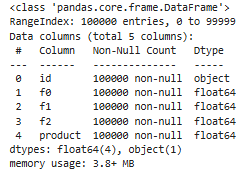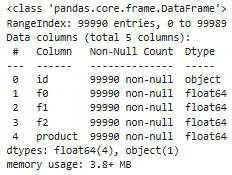


<u> Region 2 </u>

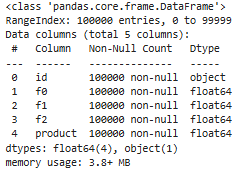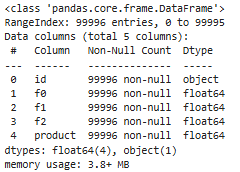

<u> Region 3 </u>

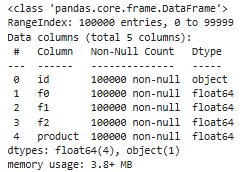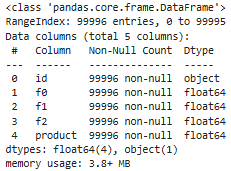

**Compare Histograms:**

<u>Region 1</u>

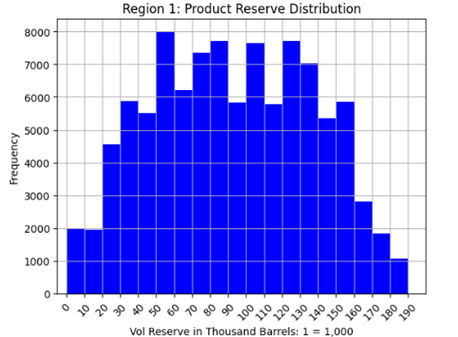
- **Range:** 0 - 190
- **Most Common Range:** 30 - 160 (Over 85,812/99,990 occurrences - ~85.82%)
- **Highest Frequency Range(s):** 50 - 140 (63,235 occurrences - ~63.24%)
- **Peak Frequency:** 50 - 60 (7,979 occurrences - 7.98%)
- **Distribution Type:** Normal with slight right skew

**Overall - Region 1:**
 This distribution indicates most oil wells have moderate reserve volumes with few extreme outliers, suggesting relatively uniform geological conditions across the region.


<u>Region 2</u>

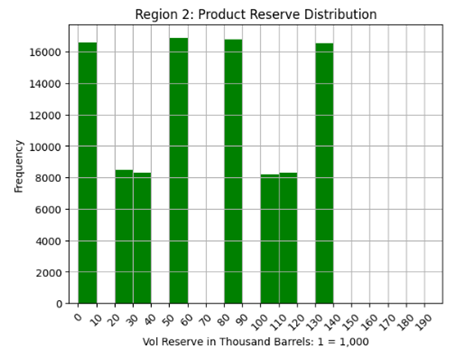
- **Range:** 0 - 140
- **Most Common Range(s):** 0-10, 50-60, 80-90, and 130 - 140 (66,718/99,994 occurrences - ~66.72%)
- **Highest Frequency Range:** (50 - 60) & (80 - 90) (33,610 occurrences - ~33.61%)
- **Peak Frequency:** 50 - 60 (16,860 occurrences - ~16.86%)
    - The other peaks are extremely similar:
        - Peak 1: 16571 (0-10)
        - Peak 2: 16860 (50-60)
        - Peak 3: 16750 (80-90)
        - Peak 4: 16537 (130-140)
- **Distribution Type:** Multimodal with distinct peaks

**Overall - Region 2:** Region 2 shows a multimodal distribution with distinct peaks, suggesting geological features create specific conditions favorable for certain oil deposit sizes. This clustering pattern indicates more predictable outcomes but requires understanding the geological feature combinations that drive each cluster to optimize well placement.


<u>Region 3</u>

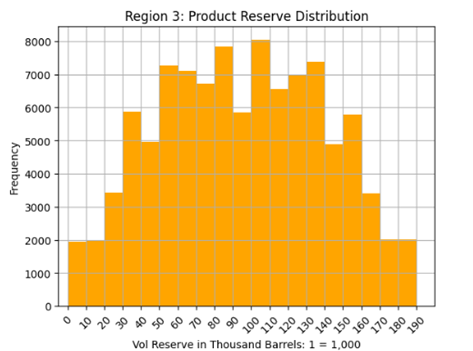
- **Range:** 0 - 190
- **Most Common Range:** 30 - 160 (Over 85,225/99,994 occurrences - ~85.23%)
- **Highest Frequency Range(s):** 50 - 140 (63,757 occurrences - ~63.76%)
- **Peak Frequency:** 100 - 110 (8,039 occurrences - 8.04%)
- **Distribution Type:** Normal with slight left skew

**Overall - Region 3:** Region 3 has its peak shifted higher compared to Region 1 (peak at 100-110 vs 50-60), suggesting this region may have more favorable geological conditions for oil accumulation. The left skew indicates more wells with higher reserve volumes than a perfect normal distribution would predict.

<u>Region 1 & 3 Comparison</u>

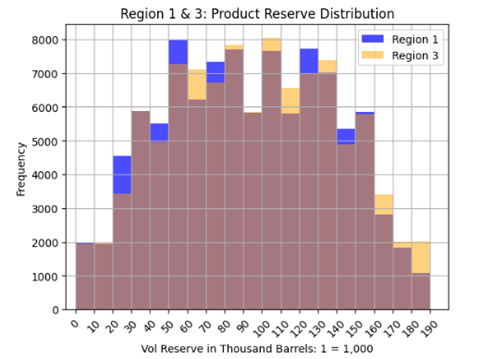

**Overall Comparison:** 
- Region 1: Normal distribution, lower average reserves
- Region 2: Multimodal clustering at specific values
- Region 3: Normal distribution, higher average reserves

**Final recommendation:** Prioritize Region 3 for immediate development due to its higher average reserves, while conducting deeper geological analysis on Region 2 to determine if the higher-yield clusters can be reliably predicted and targeted for future expansion.

# Train & Test the Model for Each Region

In [20]:
# Define the Features and Target Features (Region 1)
features_r1 = region_1_clean.drop(['id','product'],axis=1)
display(features_r1)

target_r1 = region_1_clean['product']
display(target_r1)

# Split the data into a training set and validation set at a ratio of 75:25 (Region 1)
features_r1_train, features_r1_valid, target_r1_train, target_r1_valid = train_test_split(
    features_r1,
    target_r1,
    test_size=0.25,
    random_state = 12345)


,f0,f1,f2
0,1.797736,0.098212,6.148260
1,0.518445,-0.412790,4.951916
2,0.351428,-0.400244,7.227618
3,0.624430,-0.469312,5.753677
4,1.758787,-0.395038,6.719085
...,...,...,...
99985,-0.792553,0.439711,-0.696314
99986,-0.701882,0.570246,2.288005
99987,-0.702486,0.523053,-1.224802
99988,0.701532,0.808797,-2.221334


0        185.364347
1        185.362690
2        185.355615
3        185.354980
4        185.352015
            ...    
99985      0.021781
99986      0.009428
99987      0.006114
99988      0.004022
99989      0.000000
Name: product, Length: 99990, dtype: float64

In [21]:
# Define the features and the target data (Region 2)
features_r2 = region_2_clean.drop(['id','product'],axis=1)
target_r2 = region_2_clean['product']

# Split the training and validation set on a 75:25 ratio
features_r2_train,features_r2_valid,target_r2_train, target_r2_valid = train_test_split(
    features_r2,
    target_r2, 
    test_size = 0.25, 
    random_state=12345)

In [22]:
# Define the features and traget of the dataset (Region 3)
features_r3 = region_3_clean.drop(['id','product'],axis=1)
target_r3 = region_3_clean['product']

# Split the training and validation set on a 75:25 ratio
features_r3_train, features_r3_valid, target_r3_train, target_r3_valid = train_test_split(
    features_r3, 
    target_r3, 
    test_size=0.25, 
    random_state=12345)


In [23]:
# Train the model and make predictions for the validation set (Region 1)

model_r1 = LinearRegression()
model_r1.fit(features_r1_train,target_r1_train)
predicted_valid_r1 = model_r1.predict(features_r1_valid)
display(predicted_valid_r1)

array([106.01655774,  84.10210306, 109.02831411, ...,  88.40021913,
        62.47770251,  93.27728186], shape=(24998,))

In [24]:

# Train the model and make predictions for the validation set (Region 2)

model_r2 = LinearRegression()
model_r2.fit(features_r2_train,target_r2_train)
predicted_valid_r2 = model_r2.predict(features_r2_valid)
display(predicted_valid_r2)


array([ 30.41173243,  27.36848862, 136.6258727 , ...,  56.60915898,
        55.75364857,  80.94656366], shape=(24999,))

In [25]:
# Train the model and make predictions for the validation set (Region 3)

model_r3 = LinearRegression()
model_r3.fit(features_r3_train, target_r3_train)
predicted_valid_r3 = model_r3.predict(features_r3_valid)
display(predicted_valid_r3)

array([108.31854607, 119.43156743, 131.35000544, ..., 123.54124848,
        87.02840264, 104.60108961], shape=(24999,))

In [26]:
# Save the predictions and correct answers for the validation set (Region 1)
display(predicted_valid_r1)
correct_answers_r1 = target_r1_valid
display(correct_answers_r1)

array([106.01655774,  84.10210306, 109.02831411, ...,  88.40021913,
        62.47770251,  93.27728186], shape=(24998,))

49466     93.281649
55493     83.963600
11689    149.803297
13769    146.159056
72389     59.739626
            ...    
7866     156.341608
80669     49.353643
45136     99.950394
53542     86.431082
17773    138.190876
Name: product, Length: 24998, dtype: float64

In [27]:
# Save the predictions and correct answers for the validation set (Region 2)
display(predicted_valid_r2)
correct_answers_r2 = target_r2_valid
display(correct_answers_r2)

array([ 30.41173243,  27.36848862, 136.6258727 , ...,  56.60915898,
        55.75364857,  80.94656366], shape=(24999,))

71747     30.132364
80489     26.953261
2655     137.945408
71170     30.132364
91137      3.179103
            ...    
18456    110.992147
73031     30.132364
54709     57.085625
50910     57.085625
46408     80.859783
Name: product, Length: 24999, dtype: float64

In [28]:
# Save the predictions and correct answers for the validation set (Region 3)
display(predicted_valid_r3)
correct_answers_r3 = target_r3_valid
display(correct_answers_r3)

array([108.31854607, 119.43156743, 131.35000544, ..., 123.54124848,
        87.02840264, 104.60108961], shape=(24999,))

71747     63.548463
80489     52.394767
2655     176.903474
71170     64.256442
91137     32.704265
            ...    
18456    139.371384
73031     61.898515
54709     87.715447
50910     93.344000
46408    100.824554
Name: product, Length: 24999, dtype: float64

In [29]:
# Print the average volume of predicted reserves and model RMSE (Region 1)
avg_predicted_valid_r1 = predicted_valid_r1.mean()
avg_actual_valid_r1 = target_r1_valid.mean()
mse_r1 = mean_squared_error(target_r1_valid,predicted_valid_r1)
rmse_r1 = mse_r1**0.5

display(f"Average Volume of Predicted Reserves for Region 1: {avg_predicted_valid_r1:.3f} thousand barrels")
display(f"Average Volume of Actual Reserves for Region 1: {avg_actual_valid_r1:.3f} thousand barrels")
display(f"Root Mean Squared Error (RMSE) for Region 1: {rmse_r1: .3f} thousand barrels")

'Average Volume of Predicted Reserves for Region 1: 92.596 thousand barrels'

'Average Volume of Actual Reserves for Region 1: 92.277 thousand barrels'

'Root Mean Squared Error (RMSE) for Region 1:  37.662 thousand barrels'

**Region 1 Model:**
- Average Volume of Predicted Reserves for Region 1: **92,596** barrels
- Average Volume of Actual Reserves for Region 1: **92,277** barrels
- Our model is typically off by **37,662** barrels

In [30]:
# Print the average volume of predicted reserves and model RMSE (Region 2)
avg_predicted_valid_r2 = predicted_valid_r2.mean()
avg_actual_valid_r2 = target_r2_valid.mean()
mse_r2 = mean_squared_error(target_r2_valid,predicted_valid_r2)
rmse_r2 = mse_r2**0.5

display(f"Average Volume of Predicted Reserves for Region 2: {avg_predicted_valid_r2:.3f} thousand barrels")
display(f"Average Volume of Actual Reserves for Region 2: {avg_actual_valid_r2:.3f} thousand barrels")
display(f"Root Mean Squared Error (RMSE) for Region 2: {rmse_r2:.3f} thousand barrels")
display(mse_r2)

'Average Volume of Predicted Reserves for Region 2: 68.571 thousand barrels'

'Average Volume of Actual Reserves for Region 2: 68.564 thousand barrels'

'Root Mean Squared Error (RMSE) for Region 2: 0.887 thousand barrels'

0.7874453228265313

**Region 2 Model:**
- Average Volume of Predicted Reserves for Region 2: **68,557** barrels
- Average Volume of Actual Reserves for Region 2: **68,564** barrels
- Our model is typically off by **887** barrels


In [31]:
# Print the average volume of predicted reserves and model RMSE (Region 3)
avg_predicted_valid_r3 = predicted_valid_r3.mean()
avg_actual_valid_r3 = target_r3_valid.mean()
mse_r3 = mean_squared_error(target_r3_valid,predicted_valid_r3)
rmse_r3 = mse_r3**0.5

display(f"Average Volume of Predicted Reserves for Region 3: {avg_predicted_valid_r3:.3f} thousand barrels")
display(f"Average Volume of Actual Reserves for Region 3: {avg_actual_valid_r3:.3f} thousand barrels")
display(f"Root Squared Error (RMSE): {rmse_r3:.3f} thousand barrels")

'Average Volume of Predicted Reserves for Region 3: 94.978 thousand barrels'

'Average Volume of Actual Reserves for Region 3: 94.770 thousand barrels'

'Root Squared Error (RMSE): 40.085 thousand barrels'

**Region 3 Model:**
- Average Volume of Predicted Reserves for Region 2: **94,978** barrels
- Average Volume of Actual Reserves for Region 2: **94,770** barrels
- Our model is typically off by **40,085** barrels


In [32]:
# Analyze the results
display("Model Performance Summary:")
display("==========================")
display(f"Region 1 - RMSE: {rmse_r1:.3f}, Avg Predicted: {avg_predicted_valid_r1:.3f}, Avg Actual: {avg_actual_valid_r1:.3f}")
display("------------------------------------------------------------------")
display(f"Region 2 - RMSE: {rmse_r2:.3f}, Avg Predicted: {avg_predicted_valid_r2:.3f}, Avg Actual: {avg_actual_valid_r2:.3f}")
display("------------------------------------------------------------------")
display(f"Region 3 - RMSE: {rmse_r3:.3f}, Avg Predicted: {avg_predicted_valid_r3:.3f}, Avg Actual: {avg_actual_valid_r3:.3f}")


'Model Performance Summary:'

'=========================='

'Region 1 - RMSE: 37.662, Avg Predicted: 92.596, Avg Actual: 92.277'

'------------------------------------------------------------------'

'Region 2 - RMSE: 0.887, Avg Predicted: 68.571, Avg Actual: 68.564'

'------------------------------------------------------------------'

'Region 3 - RMSE: 40.085, Avg Predicted: 94.978, Avg Actual: 94.770'

**Model Performance Summary:**

<u>Region 1:</u>
- RMSE: 37.662
- Avg Predicted: 92.596
- Avg Actual: 92.277
- Difference: +319 barrels from actual on avg

<u>Region 2:</u> 
- RMSE: 0.887
- Avg Predicted: 68.557
- Avg Actual: 68.564
- Difference: -7 barrels from Actual on avg

<u>Region 3:<u> 
- RMSE: 40.085
- Avg Predicted: 94.978
- Avg Actual: 94.770
- Difference: +208 barrels from Actual on avg

**Summary:** 

The RMSE tells us the average amount our model predictions are off by; therefore, a lower number is better. From the data above, 'Region 2' has the lowest RMSE score, meaning this model is only off by approximately 887 barrells in comparison to 'Region 1' and 'Region 3' being off by 37,622 and 40,085 barrels, respectively. 

Moreover, on average, 'Region 2' predicted volume of reserves approximately 7 barrels less than the actual volume of reserves while 'Region 1' and 'Region 3' are approximately 319 and 208 more barrels than the actual volume of reserves, on average. Not only are the predictions much more accurate for Region 2, but the prediction, on average, is lower than the actual volume of barrels which will give stakeholders a much more realistic view of the region. A slightly underestimating model is more beneficial to the mindset of a stakeholder b/c if the model slightly underestimates then stakeholders will be happy to find a higher volume of reserves, but if the actual volume happens to be lower than predicted, those disappointing shortfalls should be minimal compared to other models. 

**Most Accurate Model:** Region 2

Region 2 is exceptionally better. An RMSE of 0.887 vs 37+ suggests Region 2 has fundamentally different (and much more predictable) geological patterns than the other two regions.

# Prepare for Profit Calculation

In [33]:
# Store all key values for calculations in separate variables

# 1 unit = 1,000 barrels: 1 barrel = 4.5$: 1 unit = 4,500$
revenue_per_barrel = 4.5
revenue_per_unit = revenue_per_barrel * 1000

# Budget for 200 wells is 100 million USD = ~500,000/well
cost_of_goods = 100000000
cost_per_well = cost_of_goods / 200

display('Revenue Per Barrel:', revenue_per_barrel)
display('Revenue Per Unit:', revenue_per_unit)
print()
display('Cost of Development/ Cost of Goods:', cost_of_goods)
display('Cost of Development Per Well:', cost_per_well)

'Revenue Per Barrel:'

4.5

'Revenue Per Unit:'

4500.0

'Cost of Development/ Cost of Goods:'

100000000

'Cost of Development Per Well:'

500000.0

In [34]:
# Calculate the volume of reserves sufficient for developing a new well without losses. 

# Volume of reserve
breakeven_barrels = cost_per_well/revenue_per_barrel
display(f"Per Barrel Cost to Break Even On Revenue After Building One Well: {breakeven_barrels:.3f}")
breakeven_units = cost_per_well/revenue_per_unit
display(f"Per Thousand Barrel (1 unit) Cost to Break Even On Revenue After Building One Well: {breakeven_units:.3f}")

# Compare the obtained value with the average volume of reserves in each region

# Region 1
avg_reserves_r1 = region_1_clean['product'].mean()

# Region 2
avg_reserves_r2 = region_2_clean['product'].mean()

# Region 3
avg_reserves_r3 = region_3_clean['product'].mean()

print('---------------------------------------------------------------------------------------------')
display(f"Avg Volume of Reserves Per Thousand Barrels (Region 1): {avg_reserves_r1:.4f}")
display(f"Avg Volume of Reserves Per Thousand Barrels (Region 2): {avg_reserves_r2:.4f}")
display(f"Avg Volume of Reserves Per Thousand Barrels (Region 3): {avg_reserves_r3:.4f}")


'Per Barrel Cost to Break Even On Revenue After Building One Well: 111111.111'

'Per Thousand Barrel (1 unit) Cost to Break Even On Revenue After Building One Well: 111.111'

---------------------------------------------------------------------------------------------


'Avg Volume of Reserves Per Thousand Barrels (Region 1): 92.5017'

'Avg Volume of Reserves Per Thousand Barrels (Region 2): 68.8257'

'Avg Volume of Reserves Per Thousand Barrels (Region 3): 95.0013'

**Profit Calculation Findings:**

- If purchasing 1 well for 500,000$ to breakeven on this cost, stakeholders would need ~111,112 barrels or ~111.112 units of oil reserves in each well (500,000 / (4.5 or 4,500))
- On average Region 1 produces 92,501 barrels of oil (~92 units)
    - Falls short of the break even cost by 18.611 units (92.501 vs. 111.112)
- On average Region 2 produces 68,825 barrels of oil (~68 units)
    - Falls short of the break even cost by 42.827 units (68.825 vs. 111.112)
- On average Region 3 produces 95,001 barrels of oil (~95 units)
    - Falls short of the break even cost by 16.111 units (95.001 vs. 111.112)

**Note:** Rounded up for breakeven cost and rounded down on average oil production per region. This was purposeful to propose a more conservative view to stakeholders.

**Overall:**

On average, none of the regions are profitable. However, Region 3 comes closest to break-even, followed by Region 1, then Region 2. This reinforces why our model-based selection of the BEST 200 wells (not average wells) will be critical for profitability.

**Previous Data:** While Region 3 has the highest average reserves, Region 2 had by far the most accurate prediction model (RMSE: 0.887 vs 37-40 for others). Accurate predictions may be more valuable than slightly higher averages when selecting the best wells.

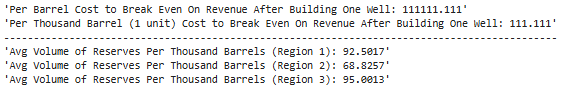

# Calculate Profit

In [35]:
# Write a function to calculate profit from a set of selected oil wells and model predictions:


def gross_profit(region_data, model, cost, n_wells = 200, n = 500):
    state = RandomState(12345)
    sampled_wells = region_data.sample(n,random_state=state)

    # Make Predictions
    features = sampled_wells.drop(['id','product'],axis=1)
    predictions = model.predict(features)
    sampled_wells = sampled_wells.copy()
    sampled_wells['predicted_reserves'] = predictions

    # Sort (highest to lowest)
    sort_wells = sampled_wells.sort_values(by= 'predicted_reserves', ascending = False)

    # Get rid of the extra indexed column
    index_wells = sort_wells.reset_index(drop=True)

    # Get top 200 wells
    top_wells = index_wells.loc[:n_wells-1]

    # Gross Profit Per Well
    gross_profit = (top_wells['product'] * 4.5) - (cost/1000)
    top_wells_1 = top_wells.copy()
    top_wells_1.loc[:,'gross_profit'] = gross_profit

    # Gross Profit Per Well (Predicted Reserves)
    gross_profit_predicted = (top_wells['predicted_reserves'] * 4.5) - (cost/1000)
    top_wells_1.loc[:,'gross_predicted_profit'] = gross_profit_predicted
    
    return top_wells_1


In [36]:
# Pick the wells with the highest values of predictions (Region 1)

# Region 1
region_1_profit = gross_profit(region_1_clean, model_r1, cost_per_well)
display(region_1_profit)

,id,f0,f1,f2,product,predicted_reserves,gross_profit,gross_predicted_profit
0,fiiu3,0.746275,-0.549638,12.017514,149.701458,167.616028,173.656559,254.272127
1,Tvutd,0.919008,0.632854,12.731566,122.079710,156.220631,49.358697,202.992839
2,RS9Mx,1.095278,-0.509299,10.110781,176.702339,155.796729,295.160524,201.085283
3,EGSjC,1.210998,-0.422642,9.690751,148.657763,152.238547,168.959934,185.073463
4,q3I4Q,0.747134,-0.491964,9.630222,110.598498,151.054940,-2.306758,179.747230
...,...,...,...,...,...,...,...,...
195,PrZ76,0.843847,0.477037,4.018117,45.504054,100.668667,-295.231756,-46.990997
196,7U5wj,-0.738624,0.717539,5.429343,97.082880,100.539398,-63.127042,-47.572708
197,Bcx3o,0.292190,0.029854,3.306951,184.385728,100.215639,329.735776,-49.029626
198,ug8LK,0.171355,0.209406,3.720868,100.950012,99.940175,-45.724944,-50.269215


In [37]:
# Pick the wells with the highest values of predictions (Region 2)

# Region 2
region_2_profit = gross_profit(region_2_clean, model_r2, cost_per_well)
display(region_2_profit)

,id,f0,f1,f2,product,predicted_reserves,gross_profit,gross_predicted_profit
0,4ljku,-11.568207,-8.906162,5.003693,137.945408,138.386305,120.754335,122.738373
1,5PeNs,-11.455163,-5.624231,5.006083,137.945408,138.361627,120.754335,122.627322
2,1BqBQ,-13.423231,-0.067898,4.999265,137.945408,138.340363,120.754335,122.531633
3,kVUDt,-12.939340,-4.590675,4.993023,137.945408,138.202080,120.754335,121.909358
4,FnPQY,-8.453252,-11.874396,5.007520,137.945408,138.103267,120.754335,121.464699
...,...,...,...,...,...,...,...,...
195,bFCmp,-1.817755,-3.908185,3.000535,84.038886,82.873434,-121.825014,-127.069549
196,RMpYj,-1.081704,-7.153059,3.000754,84.038886,82.844421,-121.825014,-127.200105
197,RpZaO,-1.426467,-6.279141,2.994985,84.038886,82.719587,-121.825014,-127.761861
198,9Ajsc,0.918286,-9.210250,3.002805,80.859783,82.655091,-136.130976,-128.052092


In [38]:
# Pick the wells with the highest values of predictions (Region 3)

# Region 3
region_3_profit = gross_profit(region_3_clean, model_r3, cost_per_well)
display(region_3_profit)

,id,f0,f1,f2,product,predicted_reserves,gross_profit,gross_predicted_profit
0,a3Pzg,2.528148,-2.278316,13.297602,164.360513,157.278785,239.622309,207.754534
1,hS8Rb,-1.979016,3.896522,12.761071,55.046627,154.135339,-252.290180,193.609028
2,bdHH6,-0.547180,-3.859311,12.297631,171.123264,151.838912,270.054688,183.275106
3,HiK2H,-0.977212,1.161740,12.287457,127.050474,151.500851,71.727131,181.753830
4,vzr5h,0.922007,-0.848622,10.729635,84.548944,142.505494,-119.529750,141.274723
...,...,...,...,...,...,...,...,...
195,sVnCl,-1.580137,0.716555,3.539831,128.305677,101.147296,77.375545,-44.837169
196,xLVmO,1.222533,-2.267388,3.542818,110.847136,101.142976,-1.187887,-44.856607
197,CqmwA,-2.173218,-0.383557,3.505700,119.631970,101.062386,38.343865,-45.219265
198,dENld,2.245791,0.436953,3.561059,71.737680,101.005214,-177.180438,-45.476539


**Note:** Seeing negative numbers in the first 5 lines under `gross_profit` for Region 1 and Region 3 is a sign that these models predictions are struggling to use the data provided to make accurate predictions to pick the most profitable oil reserve location.

In [39]:
# Summarize the target volume of reserves in accordance with these predictions

predicted_profit_r1 = region_1_profit['gross_predicted_profit'].sum()
display(f"Region 1 - Model's Prediction of Overall Gross Profit: {predicted_profit_r1:.4f}")
print("------------------------------------------------------------------")
predicted_profit_r2 = region_2_profit['gross_predicted_profit'].sum()
display(f"Region 2 - Model's Prediction of Overall Gross Profit: {predicted_profit_r2:.4f}")
print("------------------------------------------------------------------")
predicted_profit_r3 = region_3_profit['gross_predicted_profit'].sum()
display(f"Region 3 - Model's Prediction of Overall Gross Profit: {predicted_profit_r3:.4f}")

"Region 1 - Model's Prediction of Overall Gross Profit: 4196.3421"

------------------------------------------------------------------


"Region 2 - Model's Prediction of Overall Gross Profit: 4884.8824"

------------------------------------------------------------------


"Region 3 - Model's Prediction of Overall Gross Profit: 3891.0795"

In [40]:
# Calculate the profit for the obtained volume of reserves.

actual_profit_r1 = region_1_profit['gross_profit'].sum()
display(f"Region 1 - Actual Overall Gross Profit: {actual_profit_r1:.4f}")
print("---------------------------------------------------")
actual_profit_r2 = region_2_profit['gross_profit'].sum()
display(f"Region 2 - Actual Overall Gross Profit: {actual_profit_r2:.4f}")
print("---------------------------------------------------")
actual_profit_r3 = region_3_profit['gross_profit'].sum()
display(f"Region 3 - Actual Overall Gross Profit: {actual_profit_r3:.4f}")


'Region 1 - Actual Overall Gross Profit: 3009.7828'

---------------------------------------------------


'Region 2 - Actual Overall Gross Profit: 5026.9063'

---------------------------------------------------


'Region 3 - Actual Overall Gross Profit: 6407.8310'

In [41]:
# Find the Difference between the model's predicted profit and actual profit

display(f"Region 1 - The Actual Profit Was {actual_profit_r1 - predicted_profit_r1:.4f} Less Than The Model Predicted")
print('---------------------------------------------------------------------------')
display(f"Region 2 - The Actual Profit Was {actual_profit_r2 - predicted_profit_r2:.4f} More Than The Model Predicted")
print('---------------------------------------------------------------------------')
display(f"Region 3 - The Actual Profit Was {actual_profit_r3 - predicted_profit_r3:.4f} More Than The Model Predicted")

'Region 1 - The Actual Profit Was -1186.5593 Less Than The Model Predicted'

---------------------------------------------------------------------------


'Region 2 - The Actual Profit Was 142.0239 More Than The Model Predicted'

---------------------------------------------------------------------------


'Region 3 - The Actual Profit Was 2516.7515 More Than The Model Predicted'

**Regional Graph Comparison for Profit**

<u>Region 1</u>

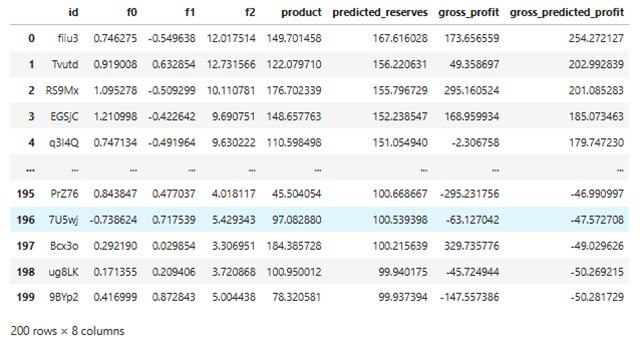

<u>Region 2</u>

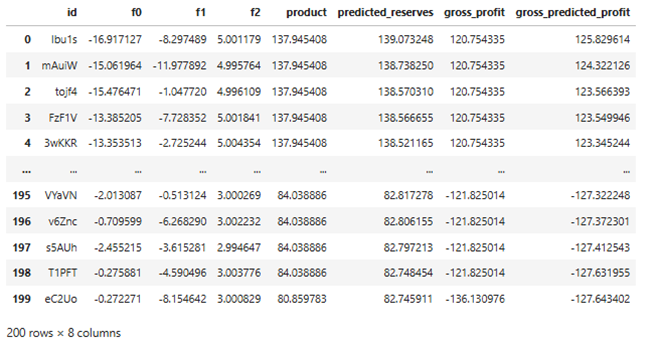

<u>Region 3</u>

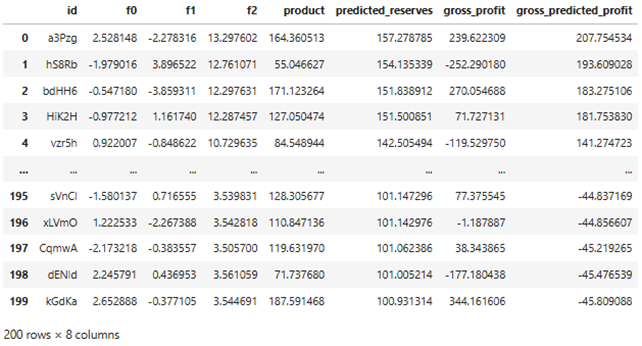

**Regional Profit Analysis Comparison**

<u>Model Predictions vs Actual Results</u>

| Region | Actual Profit | Predicted Profit | Difference | Performance |
|:-------|:-------------:|:----------------:|------------|------------:|
| **Region 1** | 3,009,782 | 4,196,342 | -1,186,559 | Model **overestimated** |
| **Region 2** | 5,012,600 | 4,946,606 | +65,993 | Model slightly **underestimated**|
| **Region 3** | 6,407,831 | 3,891,079 | +2,516,751 | Model significantly **underestimated**|

**Key Findings:**

<u>Best Region for Development:</u> **Region 3**
- **Highest actual profit**: 6,407,831
- **Biggest positive surprise**: +2,516,751 above prediction
- **Model was conservative**: Reality exceeded expectations by 65%

<u>Model Performance Analysis</u> (difference/actual: percent off of actual profit)
- **Region 1**: Model was too optimistic (-39.4% error)
- **Region 2**: Model was very accurate (+1.3% error) 
- **Region 3**: Model was too conservative (+39.3% error)




<u>**Recommendation Based on Profit Calculation:**</u>

<u>Develop Region 3</u> - Despite the model's modest prediction, this region delivered the highest actual returns and showed the greatest upside potential.

That said, this region is highly volatile and difficult to predict. In this instance, the model significantly underestimated profits, which may actually be a positive for stakeholders, as actual results are likely to exceed expectations.

# Calculate Risks & Profit for Each Region

In [42]:
features_r1_valid

,f0,f1,f2
49466,-0.740665,0.738013,6.304890
55493,-0.685457,0.846525,3.183872
11689,0.243812,-0.078312,4.438469
13769,0.923158,-0.423460,-0.518768
72389,1.866471,0.017063,2.826841
...,...,...,...
7866,-0.768831,0.517425,2.094883
80669,0.832061,-0.709503,-0.099032
45136,0.029201,0.363898,2.385484
53542,1.772470,-0.134375,-3.622204


In [43]:
# Using previous gross_profit function to write a new function to obtain the average profit, confidence interval, and risk of losses
# Use 1000 samples using the bootstrapping technique

def avg_profit_bootstrap(validation_data, model, cost, n_wells = 200, n_samples = 500, ci_lower = 0.025, ci_upper = 0.975):
    values = []

    # Sample 500 from validation set
    for i in range(1000):
        state = np.random.RandomState(12345 + i)
        subsample = validation_data.sample(n_samples, replace = True, random_state=state)
        profit_df = gross_profit(subsample, model, cost, n_wells, n_samples)
        total_profit = profit_df['gross_profit'].sum()
        values.append(total_profit)
    
    values = pd.Series(values)
    
    # Profit Calculation   
    
    avg_profit = values.mean()

    
    # Confidence Interval

    lower_bound_ci = values.quantile(ci_lower)
    upper_bound_ci = values.quantile(ci_upper)

    
    # Risk of Loss

    risk_of_loss_count = (values < 0).sum() 
    risk_of_loss_prob = risk_of_loss_count / 1000
    risk_of_loss_percent = risk_of_loss_prob * 100

    risk_of_loss = values[values < 0].value_counts()
    risk_of_loss_df = pd.DataFrame(risk_of_loss)
    risk_of_loss_df['gross_profit'] = risk_of_loss.index
    risk_of_loss_df.reset_index(drop=True)
    risk_of_loss_amount = risk_of_loss_df['gross_profit'].sum()
    risk_of_loss_amount_average = risk_of_loss_df['gross_profit'].mean()


    print("Profit Metrics: Regional Investment Analysis")
    print()
    print("(Based on selecting best 200 wells in 1000 scenarios)")
    print("-----------------------------------------------------")
    print(f"Average Total Regional Profit: {avg_profit:.5f}")
    print(f"Average Profit Per Well: {avg_profit/n_wells:.5f}")
    print(f"Confidence Interval (95%):")
    print(f"Lower Bound (0.025) : {lower_bound_ci:.5f}")
    print(f"Upper Bound(0.975) : {upper_bound_ci:.5f}")
    print()
    print("Risk of Loss Metrics: Regional Investment Risk")
    print("------------------------------------------------------")
    print(f"Probability of Loss: {risk_of_loss_prob:.4f} from 1000 scenarios")
    print(f"Percent Risk of Loss: {risk_of_loss_percent:.2f}% from 1000 scenarios")
    print(f"Number of Negative Samples: {risk_of_loss_count} out of 1000")
    print()
    print("Total Loss & Avg Loss: Negative Profits ONLY")
    print("------------------------------------------------------")
    print(f"Total Loss: {risk_of_loss_amount:.5f}")
    print(f"Avg Loss: {risk_of_loss_amount_average:.5f}")
    

In [44]:

# Get the entire DF for features_r1_valid (add id column back)

# Region 1

# Create the 'id' index for from features_r1_valid
features_r1_valid_copy = features_r1_valid.copy()

features_r1_valid_index = features_r1_valid_copy.index
display(features_r1_valid_index)

# Use the index 
validation_data_r1 = region_1_clean.loc[features_r1_valid_index].copy()

# Display
display(validation_data_r1)

# Verify
display(features_r1_valid, target_r1_valid)


# Region 2 
features_r2_valid_copy = features_r2_valid.copy()
features_r2_valid_index = features_r2_valid_copy.index
validation_data_r2 = region_2_clean.loc[features_r2_valid_index].copy()

# Region 3
features_r3_valid_copy = features_r3_valid.copy()
features_r3_valid_index = features_r3_valid_copy.index
validation_data_r3 = region_3_clean.loc[features_r3_valid_index].copy()


Index([49466, 55493, 11689, 13769, 72389, 25305, 57331, 84623, 93616, 29052,
       ...
       18456, 73025, 91029, 74770, 25264,  7866, 80669, 45136, 53542, 17773],
      dtype='int64', length=24998)

,id,f0,f1,f2,product
49466,sSS8q,-0.740665,0.738013,6.304890,93.281649
55493,ze87n,-0.685457,0.846525,3.183872,83.963600
11689,Hc2Aq,0.243812,-0.078312,4.438469,149.803297
13769,AvMPv,0.923158,-0.423460,-0.518768,146.159056
72389,tblIi,1.866471,0.017063,2.826841,59.739626
...,...,...,...,...,...
7866,UdPD5,-0.768831,0.517425,2.094883,156.341608
80669,zB2VS,0.832061,-0.709503,-0.099032,49.353643
45136,87suN,0.029201,0.363898,2.385484,99.950394
53542,SfCS7,1.772470,-0.134375,-3.622204,86.431082


,f0,f1,f2
49466,-0.740665,0.738013,6.304890
55493,-0.685457,0.846525,3.183872
11689,0.243812,-0.078312,4.438469
13769,0.923158,-0.423460,-0.518768
72389,1.866471,0.017063,2.826841
...,...,...,...
7866,-0.768831,0.517425,2.094883
80669,0.832061,-0.709503,-0.099032
45136,0.029201,0.363898,2.385484
53542,1.772470,-0.134375,-3.622204


49466     93.281649
55493     83.963600
11689    149.803297
13769    146.159056
72389     59.739626
            ...    
7866     156.341608
80669     49.353643
45136     99.950394
53542     86.431082
17773    138.190876
Name: product, Length: 24998, dtype: float64

In [45]:
# Region 1:
# Profit Metrics & Risk Assessment

display(avg_profit_bootstrap(validation_data_r1, model_r1, cost_per_well))


Profit Metrics: Regional Investment Analysis

(Based on selecting best 200 wells in 1000 scenarios)
-----------------------------------------------------
Average Total Regional Profit: 3953.08252
Average Profit Per Well: 19.76541
Confidence Interval (95%):
Lower Bound (0.025) : -1003.76852
Upper Bound(0.975) : 9120.65957

Risk of Loss Metrics: Regional Investment Risk
------------------------------------------------------
Probability of Loss: 0.0660 from 1000 scenarios
Percent Risk of Loss: 6.60% from 1000 scenarios
Number of Negative Samples: 66 out of 1000

Total Loss & Avg Loss: Negative Profits ONLY
------------------------------------------------------
Total Loss: -82465.19193
Avg Loss: -1249.47261


None

In [46]:
# Region 2:
# Profit Metrics & Risk Assessment

display(avg_profit_bootstrap(validation_data_r2, model_r2, cost_per_well))

Profit Metrics: Regional Investment Analysis

(Based on selecting best 200 wells in 1000 scenarios)
-----------------------------------------------------
Average Total Regional Profit: 4084.35176
Average Profit Per Well: 20.42176
Confidence Interval (95%):
Lower Bound (0.025) : 167.68425
Upper Bound(0.975) : 8060.39213

Risk of Loss Metrics: Regional Investment Risk
------------------------------------------------------
Probability of Loss: 0.0180 from 1000 scenarios
Percent Risk of Loss: 1.80% from 1000 scenarios
Number of Negative Samples: 18 out of 1000

Total Loss & Avg Loss: Negative Profits ONLY
------------------------------------------------------
Total Loss: -9325.89346
Avg Loss: -518.10519


None

In [47]:
# Region 3:
# Profit Metrics & Risk Assessment

display(avg_profit_bootstrap(validation_data_r3, model_r3, cost_per_well))

Profit Metrics: Regional Investment Analysis

(Based on selecting best 200 wells in 1000 scenarios)
-----------------------------------------------------
Average Total Regional Profit: 3142.06712
Average Profit Per Well: 15.71034
Confidence Interval (95%):
Lower Bound (0.025) : -2286.62052
Upper Bound(0.975) : 8055.17751

Risk of Loss Metrics: Regional Investment Risk
------------------------------------------------------
Probability of Loss: 0.1300 from 1000 scenarios
Percent Risk of Loss: 13.00% from 1000 scenarios
Number of Negative Samples: 130 out of 1000

Total Loss & Avg Loss: Negative Profits ONLY
------------------------------------------------------
Total Loss: -186924.87507
Avg Loss: -1437.88365


None

**Regional Investment Analysis Comparison:**

<u>Profit Metrics Summary</u>

*(Based on selecting best 200 wells in 1000 scenarios)*

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **Average Total Regional Profit** | 3,953.0825 | 4,083.3217 | 3,142.0671 |
| **Average Profit Per Well** | 19.7654 | 20.4166 | 15.7103 |
| **Lower Bound (2.5%)** | -1,003.7865 | 203.0293 | -2,286.6205 |
| **Upper Bound (97.5%)** | 9,120.6595 | 8,052.5083 | 8,055.1775 |

<u>Risk of Loss Metrics</u>

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **Probability of Loss** | 0.066 | 0.018 | 0.130 |
| **Percent Risk of Loss** | 6.60% | 1.80% | 13.00% |
| **Negative Samples** | 66/1000 | 18/1000 | 130/1000 |

<u>Loss Analysis</u>

*(Negative Profits ONLY)*

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **Total Loss** | -82,465.1919 | -9,254.3636 | -186,924.8750 |
| **Average Loss** | -1,249.4726 | -514.1313 | -1,437.8836 |

---

**Key Insights:**

- **Best Profitability**: Region 2 (highest average profit per well: 20,416)
- **Lowest Risk**: Region 2 (only 1.80% chance of loss)
- **Most Stable**: Region 2 (positive lower confidence bound - guaranteed profitability)
- **Highest Risk**: Region 3 (13.0% chance of loss, largest potential losses)
- **Highest Upside Potential**: Region 1 (greatest possible reward in best-case scenarios)


**Overall:** 

Region 2 is the only region with the risk of losses lower than 2.5% and has the highest average profit (4,083,321). Region 2 makes the most profit (on average), least risk (1.8%) with the only lower bound marked as profitable, and the least amount of total (-9,254,363) and average (-514,131) losses. The total losses for Region 2 is more than 70 million less than the second lowest region(Region 1). The average losses for Region 2 is ~73,000 less than the second lowest region(Region1).

However, Region 2 has the lowest upside potential (lowest upper bound) making it the least profitable region in the best case scenario.

|                                            

Selected Region of Development: **Region 2**



# Final Conclusion

**Summary:**
After extensive analysis of model accuracy, profitability, and investment risk across all three regions, Region 2 emerges as the optimal choice for development.

**Model Accuracy:** Region 2 had by far the most reliable prediction model (RMSE of 0.887 vs. 37–40 in Regions 1 and 3). Accurate forecasting reduces uncertainty and allows for better planning.

|**Regional Model Performance Comparison Chart**|
|:---------------------------------------------:|

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **RMSE** | 37.662 | 0.887 | 40.085 |
| **Average Predicted** | 92.596 | 68.557 | 94.978 |
| **Average Actual** | 92.277 | 68.564 | 94.770 |
| **Difference from Actual** | +319 barrels | -7 barrels | +208 barrels |
| **Accuracy Ranking** | 2nd | 1st (Best) | 3rd (Worst) |

|**Model Predictions vs Actual Results**|
|:-------------------------------------:|

| Region | Actual Profit | Predicted Profit | Difference | Performance |
|:-------|:-------------:|:----------------:|------------|------------:|
| **Region 1** | 3,009,782 | 4,196,342 | -1,186,559 | Model **overestimated** |
| **Region 2** | 5,012,600 | 4,946,606 | +65,993 | Model slightly **underestimated**|
| **Region 3** | 6,407,831 | 3,891,079 | +2,516,751 | Model significantly **underestimated**|



**Profitability:** Region 2 delivered the highest average profit per well (2,416) and the highest total average profit (4,083,321).

**Risk Profile:** With only a 1.8% probability of loss, Region 2 offers the most stable returns. It is also the only region with a positive lower confidence bound, effectively guaranteeing profitability across scenarios.

**Comparisons:** Region 3 showed the highest upside potential but also the greatest volatility and a 13.0% chance of loss. Region 1 offered moderate returns and upside but carried higher risk than Region 2.

|**Regional Profitability & Risk Analysis**|
|:----------------------------------------:|

|*(Based on selecting best 200 wells in 1000 scenarios)*|
|:------------------------------------------------------|

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **Average Total Regional Profit** | 3,953,082 | 4,083,321 | 3,142,067 |
| **Average Profit Per Well** | 19,765 | 20,416 | 15,710 |
| **Lower Bound (2.5%)** | -1,003,786 | 203,029 | -2,286,620 |
| **Upper Bound (97.5%)** | 9,120,659 | 8,052,508 | 8,055,177 |
| **Probability of Loss** | 0.066 | 0.018 | 0.130 |
| **Percent Risk of Loss** | 6.60% | 1.80% | 13.00% |
| **Negative Samples** | 66/1000 | 18/1000 | 130/1000 |
| **Total Loss** | -82,465,191 | -9,254,363 | -186,924,875 |
| **Average Loss** | -1,249,472 | -514,131 | -1,437,883 |

**Overall:**

Region 2 balances strong profitability with minimal downside risk, making it the most strategic and sustainable investment. While Region 3’s unexpectedly high actual profits demonstrate potential, its volatility makes it less dependable. Region 1 presents opportunities but falls short of Region 2 in both accuracy and risk-adjusted returns.

**Final Recommendation:**

<u>Develop Region 2</u> — it offers the best combination of profitability, accuracy, and risk control, ensuring consistent stakeholder value with limited exposure to losses.

# Supplemental Information

## Data Preparation:
- No missing Data
- Handled Duplicate Data:
    - Region 1 = 10 duplicate oil wells
    - Region 2 = 4 duplicate oil wells
    - Region 3 = 4 duplicate oil wells
- For Duplicate Data:
    - Used the `product` column to choose the oil well with a higher number of barrels
    - Reasoning: Better to falsely look into an oil well with less profit than miss an oil well with abundant profit. Additionally, only 18/300,000 (0.006%) oil wells were duplicated leaving an insignificant mark on the data as a whole.
        - Region 1 = 10/100,000 = 0.01%
        - Region 2 = 4/100,000 = 0.004%
        - Region 3 = 4/100,000 = 0.004%

**Compare Data:**

<u> Region 1 </u>

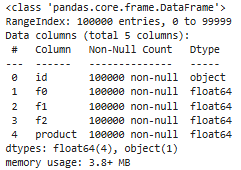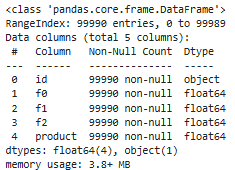


<u> Region 2 </u>

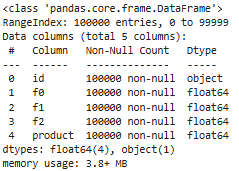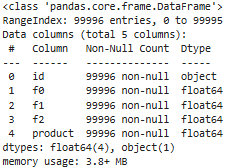

<u> Region 3 </u>

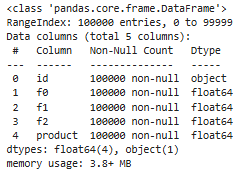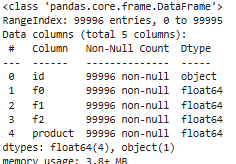

## Distribution Comparison

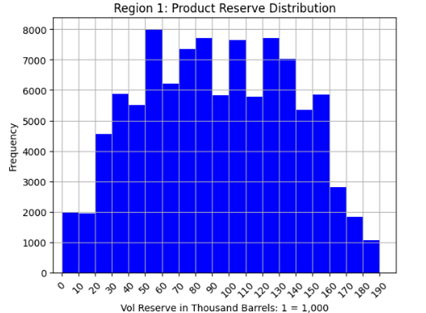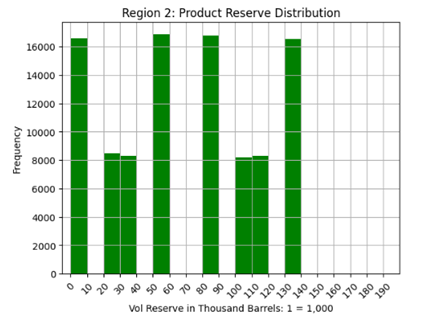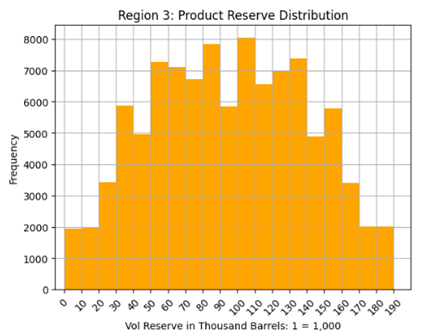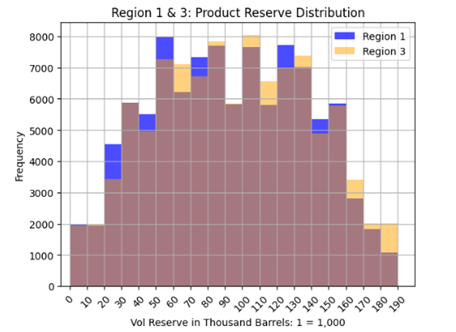

|Oil Well Reserve Distribution Comparison Chart:|
|:---------------------------------------------:|

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **Range** | 0 - 190 | 0 - 140 | 0 - 190 |
| **Most Common Range** | <u>30 - 160</u><br>(85,812 wells - 85.82%) | <u>0-10, 50-60, 80-90, 130-140</u><br>(66,718 wells - 66.72%) | <u>30 - 160</u><br>(85,225 wells - 85.23%) |
| **Highest Frequency Range** | <u>50 - 140</u><br>(63,235 wells - 63.24%) | <u>50-60 **&** 80-90</u><br>(33,610 wells - 33.61%) | <u>50 - 140</u><br>(63,757 wells - 63.76%) |
| **Peak Frequency** | <u>50 - 60</u><br>(7,979 wells - 7.98%) | <u>50 - 60</u><br>(16,860 wells - 16.86%) | <u>100 - 110</u><br>(8,039 wells - 8.04%) |
| **Distribution Type** | Normal with slight right skew | Multimodal with distinct peaks | Normal with slight left skew |
| **Key Characteristics** | Moderate reserves, uniform conditions | Four distinct geological "sweet spots" | Higher average reserves, favorable conditions |

|Region 2 Peak Details|
|:-------------------:|

| Peak | Range | Well Count |
|------|-------|------------|
| Peak 1 | 0-10 | 16,571 |
| Peak 2 | 50-60 | 16,860 |
| Peak 3 | 80-90 | 16,750 |
| Peak 4 | 130-140 | 16,537 |

**Summary:**
- **Region 1**: Predictable, moderate yields with uniform geological conditions
- **Region 2**: Unique multimodal clustering suggesting specific geological formations create distinct reserve levels
- **Region 3**: Highest average reserves (peak at 100-110k vs others at 50-60k), indicating superior geological conditions for oil accumulation

**Final Recommendation (Based on Distribution Data ONLY):** Prioritize Region 3 for immediate development due to its higher average reserves, while conducting deeper geological analysis on Region 2 to determine if the higher-yield clusters can be reliably predicted and targeted for future expansion.

## Model Performance Summary:

<u>Region 1:</u>
- RMSE: 37.662
- Avg Predicted: 92.596
- Avg Actual: 92.277
- Difference: +319 barrels from actual on avg

<u>Region 2:</u> 
- RMSE: 0.887
- Avg Predicted: 68.557
- Avg Actual: 68.564
- Difference: -7 barrels from Actual on avg

<u>Region 3:<u> 
- RMSE: 40.085
- Avg Predicted: 94.978
- Avg Actual: 94.770
- Difference: +208 barrels from Actual on avg

**Summary:** 

The RMSE tells us the average amount our model predictions are off by; therefore, a lower number is better. From the data above, 'Region 2' has the lowest RMSE score, meaning this model is only off by approximately 887 barrells in comparison to 'Region 1' and 'Region 3' being off by 37,622 and 40,085 barrels, respectively. 

Moreover, on average, 'Region 2' predicted volume of reserves approximately 7 barrels less than the actual volume of reserves while 'Region 1' and 'Region 3' are approximately 319 and 208 more barrels than the actual volume of reserves, on average. Not only are the predictions much more accurate for Region 2, but the prediction, on average, is lower than the actual volume of barrels which will give stakeholders a much more realistic view of the region. A slightly underestimating model is more beneficial to the mindset of a stakeholder b/c if the model slightly underestimates then stakeholders will be happy to find a higher volume of reserves, but if the actual volume happens to be lower than predicted, those disappointing shortfalls should be minimal compared to other models.

**Most Accurate Model:** Region 2

Region 2 is exceptionally better. An RMSE of 0.887 vs 37+ suggests Region 2 has fundamentally different (and much more predictable) geological patterns than the other two regions.

## Profit Calculation Findings:

- If purchasing 1 well for 500,000$ to breakeven on this cost, stakeholders would need ~111,112 barrels or ~111.112 units of oil reserves in each well (500,000 / (4.5 or 4,500))
- On average Region 1 produces 92,501 barrels of oil (~92 units)
    - Falls short of the break even cost by 18.611 units (92.501 vs. 111.112)
- On average Region 2 produces 68,825 barrels of oil (~68 units)
    - Falls short of the break even cost by 42.827 units (68.825 vs. 111.112)
- On average Region 3 produces 95,001 barrels of oil (~95 units)
    - Falls short of the break even cost by 16.111 units (95.001 vs. 111.112)
**Note:** Rounded up for breakeven cost and rounded down on average oil production per region. This was purposeful to propose a more conservative view to stakeholders.

**Overall:**

On average, none of the regions are profitable. However, Region 3 comes closest to break-even, followed by Region 1, then Region 2. This reinforces why our model-based selection of the BEST 200 wells (not average wells) will be critical for profitability.

**Previous Data:** While Region 3 has the highest average reserves, Region 2 had by far the most accurate prediction model (RMSE: 0.887 vs 37-40 for others). Accurate predictions may be more valuable than slightly higher averages when selecting the best wells.

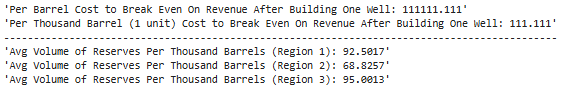

## Compare Regions By Profit:

<u>Region 1</u>

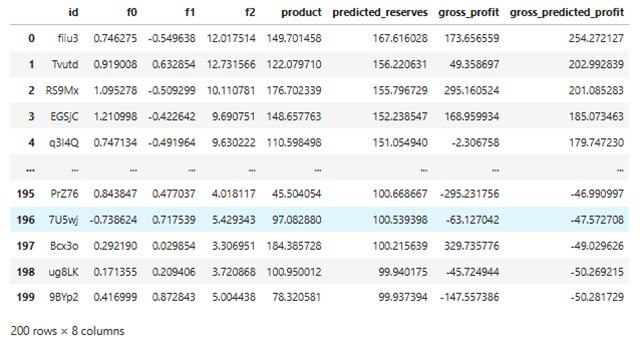

<u>Region 2</u>

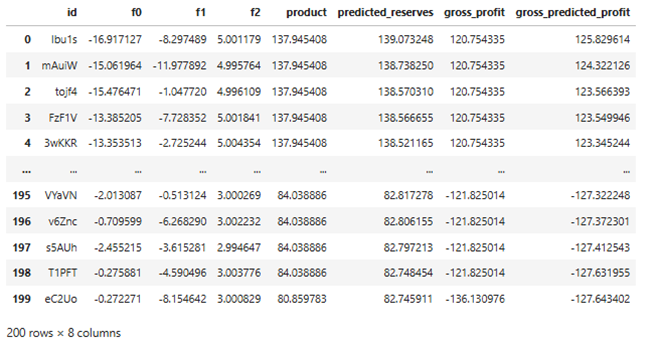

<u>Region 3</u>

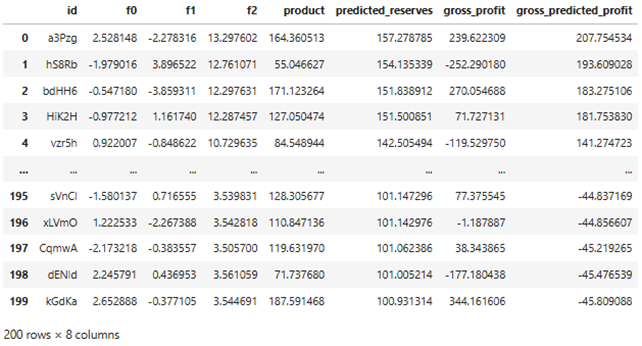

**Note:** Seeing negative numbers in the first 5 lines under `gross_profit` for Region 1 and Region 3 is a sign that these models predictions are struggling to use the data provided to make accurate predictions to pick the most profitable oil reserve location.

**Regional Profit Analysis Comparison**


<u>Model Predictions vs Actual Results</u>

| Region | Actual Profit | Predicted Profit | Difference | Performance |
|:-------|:-------------:|:----------------:|------------|------------:|
| **Region 1** | 3,009,782 | 4,196,342 | -1,186,559 | Model **overestimated** |
| **Region 2** | 5,012,600 | 4,946,606 | +65,993 | Model slightly **underestimated**|
| **Region 3** | 6,407,831 | 3,891,079 | +2,516,751 | Model significantly **underestimated**|


**Key Findings:**

<u>Best Region for Development:</u> **Region 3**
- **Highest actual profit**: 6,407,831
- **Biggest positive surprise**: +2,516,751 above prediction
- **Model was conservative**: Reality exceeded expectations by 65%

<u>Model Performance Analysis</u> (difference/actual: percent off of actual profit)
- **Region 1**: Model was too optimistic (-39.4% error)
- **Region 2**: Model was very accurate (+1.3% error) 
- **Region 3**: Model was too conservative (+39.3% error)




<u>**Recommendation Based on Profit Calculation:**</u>

<u>Develop Region 3</u> - Despite the model's modest prediction, this region delivered the highest actual returns and showed the greatest upside potential.

That said, this region is highly volatile and difficult to predict. In this instance, the model significantly underestimated profits, which may actually be a positive for stakeholders, as actual results are likely to exceed expectations.

## Regional Investment Analysis Comparison:

<u>Profit Metrics Summary</u>

*(Based on selecting best 200 wells in 1000 scenarios)*

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **Average Total Regional Profit** | 3,953.0825 | 4,083.3217 | 3,142.0671 |
| **Average Profit Per Well** | 19.7654 | 20.4166 | 15.7103 |
| **Lower Bound (2.5%)** | -1,003.7865 | 203.0293 | -2,286.6205 |
| **Upper Bound (97.5%)** | 9,120.6595 | 8,052.5083 | 8,055.1775 |

<u>Risk of Loss Metrics</u>

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **Probability of Loss** | 0.066 | 0.018 | 0.130 |
| **Percent Risk of Loss** | 6.60% | 1.80% | 13.00% |
| **Negative Samples** | 66/1000 | 18/1000 | 130/1000 |

<u>Loss Analysis</u>

*(Negative Profits ONLY)*

| Metric | Region 1 | Region 2 | Region 3 |
|--------|----------|----------|----------|
| **Total Loss** | -82,465.1919 | -9,254.3636 | -186,924.8750 |
| **Average Loss** | -1,249.4726 | -514.1313 | -1,437.8836 |

---

**Key Insights:**

- **Best Profitability**: Region 2 (highest average profit per well: 20,416)
- **Lowest Risk**: Region 2 (only 1.80% chance of loss)
- **Most Stable**: Region 2 (positive lower confidence bound - guaranteed profitability)
- **Highest Risk**: Region 3 (13.0% chance of loss, largest potential losses)
- **Highest Upside Potential**: Region 1 (greatest possible reward in best-case scenarios)


**Overall:** 

Region 2 is the only region with the risk of losses lower than 2.5% and has the highest average profit (4,083,321). Region 2 makes the most profit (on average), least risk (1.8%) with the only lower bound marked as profitable, and the least amount of total (-9,254,363) and average (-514,131) losses. The total losses for Region 2 is more than 70 million less than the second lowest region(Region 1). The average losses for Region 2 is ~73,000 less than the second lowest region(Region1).

However, Region 2 has the lowest upside potential (lowest upper bound) making it the least profitable region in the best case scenario.

|                                            

Selected Region of Development: **Region 2**

